<a href="https://colab.research.google.com/github/PPatrickGU/ROB317/blob/main/TP6_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ROB311 TP6** 

### **Implementation of the algorithm of K-means to identify the handwriting number** 

*Author: Yan CHEN & Dajing GU*

In [ ]:
import pandas as pd
import numpy as np
import itertools
import operator
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib.colors import  rgb2hex
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

### **Useful function**

In [ ]:
def data_loading(path):
    dataset = pd.read_csv(path,header=None)
    data = dataset.iloc[:, 0:-1]
    label = dataset.iloc[:, -1]
    return data, label

def plot_result(data, data_label_pred, centers, title):
  plt.figure(figsize=(12, 8))
  colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'] 
  for i, color in enumerate(colors): #cluster
    need_idx = np.where(data_label_pred==i)[0]
    plt.scatter(data[need_idx,1],data[need_idx,0], c=color, label= i)
  for i in range(10): #centroid
    plt.scatter(centers[i,1], centers[i,0], c='k', marker = '+', s = 100)  
  plt.legend(loc='upper right')
  plt.title(title)
  plt.show()

def print_cross_table(label, pred):
  # Create a DataFrame with labels and varieties as columns: df
  df = pd.DataFrame({'Labels': label, 'Clusters': pred})
  # Create crosstab: ct
  ct = pd.crosstab(df['Labels'], df['Clusters'])
  # Display ct
  print(ct)

def getAccuracy(testSet, predictions):
  correct = 0
  for x in range(testSet.shape[0]):
    if testSet[x] == predictions[x]:
      correct += 1
  print("\n Accuracy: %.2f%% \n" %float(correct/len(predictions)*100))


# Reference : https://blog.csdn.net/u012193416/article/details/79469770
def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = 'Normalized confusion matrix'
        print("Normalized confusion matrix")
    else:
        title = 'Confusion matrix without normalization'
        print('Confusion matrix without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 verticalalignment='top',
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()  

def getResult(prediction_label, test_label):
    cm = confusion_matrix(test_label, prediction_label)
    #print("classification report : ", "\n", classification_report(test_label, prediction_label))
    print("\n", "confusion matrix:", "\n", cm, "\n")
    getAccuracy(prediction_label, test_label)
    label_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    plot_confusion_matrix(cm, classes=label_names, normalize=True)

#Reference: https://stackoverflow.com/questions/45114760/how-to-plot-the-confusion-similarity-matrix-of-a-k-mean-algorithm
def getTrainLabelMatched(train_label, train_label_pred):
  k_labels = train_label_pred  # Get cluster labels
  k_labels_matched = np.empty_like(train_label)
  
  # For each cluster label...
  for k in np.unique(k_labels):
    # ...find and assign the best-matching real label
    match_nums = [np.sum((k_labels==k)&(train_label==t)) for t in np.unique(train_label)]
    k_labels_matched[k_labels==k] = np.unique(train_label)[np.argmax(match_nums)]
  return k_labels_matched

def getLabelMatched(train_label, train_label_pred, test_label, test_label_pred):
  k_train_labels_matched = np.empty_like(train_label)
  k_test_labels_matched = np.empty_like(test_label)

  # For each cluster label...
  for k in np.unique(train_label):
    # ...find and assign the best-matching real label
    match_nums = [np.sum((train_label_pred==k)&(train_label==t)) for t in np.unique(train_label)]
    k_train_labels_matched[train_label_pred==k] = np.unique(train_label)[np.argmax(match_nums)]
    k_test_labels_matched[test_label_pred==k] = np.unique(test_label)[np.argmax(match_nums)]
  return k_train_labels_matched, k_test_labels_matched

### **Data loading**

In [ ]:
train_path = "./optdigits.tra"
test_path = "./optdigits.tes"
train_data, train_label = data_loading(train_path)
test_data, test_label = data_loading(test_path)

### **I）A simple implementation of the algorithm**


**Training the model with the training data**







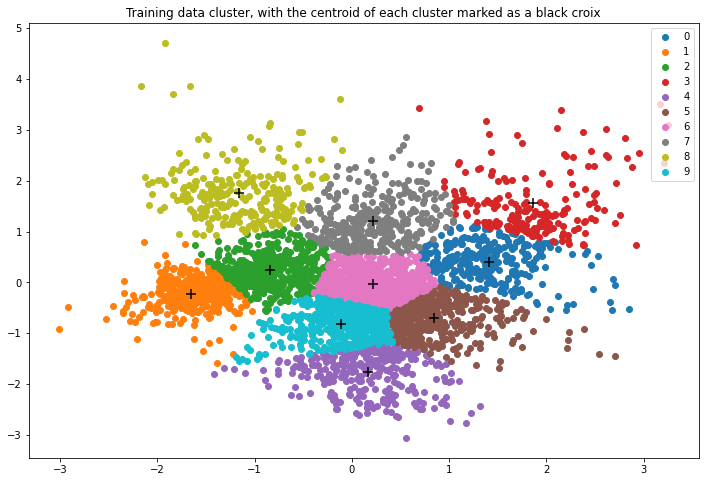

In [ ]:
train_data_scaled = StandardScaler().fit_transform(train_data)
pca = PCA(n_components=2, svd_solver='auto', whiten = True)
#pca = PCA(n_components = 'mle', svd_solver='full', whiten = True)
pca.fit(train_data_scaled)
train_data_PCA = pca.transform(train_data_scaled)
kmeans = KMeans(n_clusters=10, random_state=0).fit(train_data_PCA)
train_label_pred = kmeans.labels_
centers = kmeans.cluster_centers_

plot_result(train_data_PCA, train_labels, centers, 'Training data cluster, with the centroid of each cluster marked as a black croix')



 confusion matrix: 
 [[313  11   0   0   5   3  41   0   0   3]
 [ 58 132   5   3   0 153   6   8   0  24]
 [  1   0 238  37   0   8   0   5   0  91]
 [  1   0  63 197   0  20   0  26   0  82]
 [ 28  72   0   5 253   7   7  15   0   0]
 [ 12  12   2  83   0 188   0  14   0  65]
 [ 34   0   0   0   0   2 340   0   0   1]
 [  0  11   0  24   0  18   0 333   0   1]
 [ 18  11   0  61   0 183   0  12   0  95]
 [  6  68   7  36   0 107   0  59   0  99]] 


 Accuracy: 54.75% 

Normalized confusion matrix


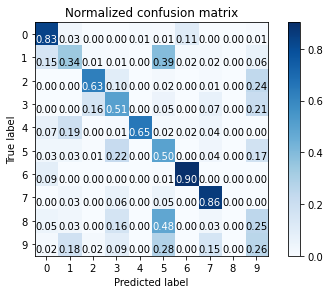

In [ ]:
train_label_matched = getTrainLabelMatched(train_label, train_label_pred)
getResult(train_label_matched, train_label)

**Classify the test data the model trained**

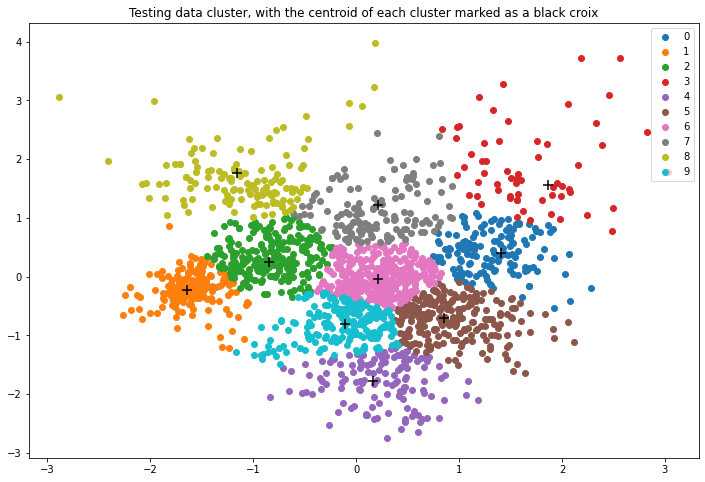

In [ ]:
test_data_scaled = StandardScaler().fit_transform(test_data)
test_data_PCA = pca.transform(test_data_scaled)
test_label_pred = kmeans.predict(test_data_PCA)
plot_result(test_data_PCA, test_label_pred, centers, 'Testing data cluster, with the centroid of each cluster marked as a black croix')


 confusion matrix: 
 [[142   4   0   0   1   9  20   0   0   2]
 [  9  59   2   0   0  79   7   3   0  23]
 [  2   4 109  22   0   9   0   1   0  30]
 [  3   0  18  95   0   7   0  19   0  41]
 [ 21  24   0   3 130   0   1   2   0   0]
 [ 11  10   2  57   0  61   0  11   0  30]
 [ 34   0   0   0   0   0 147   0   0   0]
 [  0  13   0  12   0   9   0 145   0   0]
 [  7  15   1  27   0  84   0   4   0  36]
 [  1  13   5  27   0  65   0  19   0  50]] 


 Accuracy: 52.20% 

Normalized confusion matrix


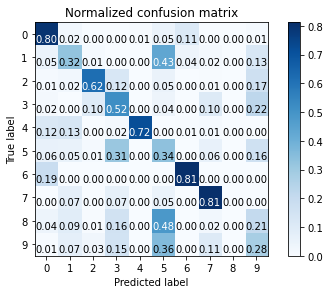

In [ ]:
train_label_matched, test_label_matched = getLabelMatched(train_label, train_label_pred, test_label, test_label_pred)
getResult(test_label_matched, test_label)